<a href="https://colab.research.google.com/github/Lakshmi-Chandana/DATA-602/blob/main/602_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
housing = pd.read_csv('housing_processed.csv')
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,RFn,2,548,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,TA,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,RFn,2,460,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,TA,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,RFn,2,608,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,TA,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Unf,3,642,...,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,TA,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,RFn,3,836,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [2]:
housing[["ExterQual","ExterQual_Coded"]].head()

,ExterQual,ExterQual_Coded
0,Gd,3
1,TA,2
2,Gd,3
3,TA,2
4,Gd,3


In [3]:
type(housing.dtypes==object)

pandas.core.series.Series

In [4]:
housing.dtypes[housing.dtypes==object]

ExterQual       object
ExterCond       object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
HeatingQC       object
CentralAir      object
KitchenQual     object
Functional      object
FireplaceQu     object
GarageFinish    object
GarageQual      object
GarageCond      object
PavedDrive      object
dtype: object

In [5]:
housing.dtypes[housing.dtypes==object].shape

(16,)

In [6]:
"SalePrice" in housing.columns

True

In [7]:
len(housing.columns)

238

In [8]:
housing_ml = housing.drop(columns=["ExterQual"])

In [9]:
housing_ml = housing.loc[:,housing.dtypes != object]

In [10]:
len(housing_ml.columns)

222

In [11]:
housing_ml.shape

(1460, 222)

In [12]:
# Split data as features and target
# take "SalePrice" values into its own 1-D array 
sale_price = housing_ml.pop('SalePrice')

In [13]:
type(sale_price)

pandas.core.series.Series

In [14]:
housing_ml.shape

(1460, 221)

In [15]:
y = sale_price.values
type(y)

numpy.ndarray

In [16]:
y.shape

(1460,)

In [17]:
X = housing_ml.values

In [18]:

X.shape

(1460, 221)

In [19]:
X.shape[0] == y.shape[0]

True

In [20]:
# Import estimator
from sklearn.dummy import DummyRegressor

In [21]:
# Instantiate estimator
# guess the mean every single time
mean_reg = DummyRegressor(strategy='mean')
# fit estimator
mean_reg.fit(X, y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [22]:

# predict
mean_reg.predict(X)

array([180921.19589041, 180921.19589041, 180921.19589041, ...,
       180921.19589041, 180921.19589041, 180921.19589041])

In [23]:
mean_reg.score(X, y)

0.0

In [24]:

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [25]:
X_lf = housing_ml[['LotFrontage']]

In [26]:
linear_model.fit(X_lf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = linear_model.predict(X_lf)

In [28]:
linear_model.score(X_lf, y)

0.11215612336205594

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

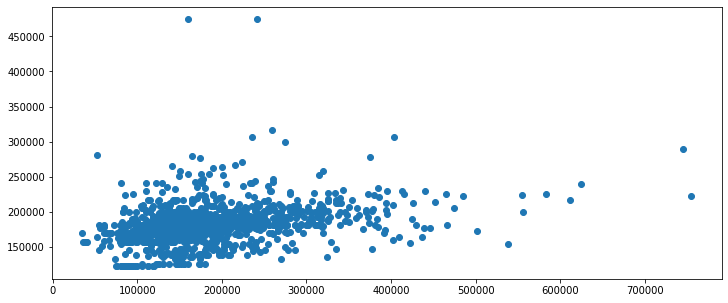

In [30]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred);

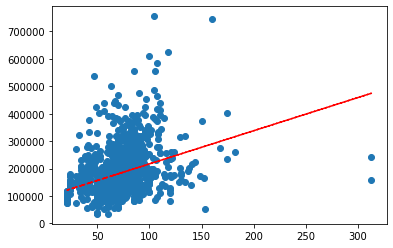

In [31]:
plt.scatter(X_lf,y)
plt.plot(X_lf,y_pred,'r--')

In [32]:
X_area = housing_ml[['GrLivArea']]

In [33]:

linear_model.fit(X_area, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred2 = linear_model.predict(X_area)
linear_model.score(X_area, y)

0.5021486502718042

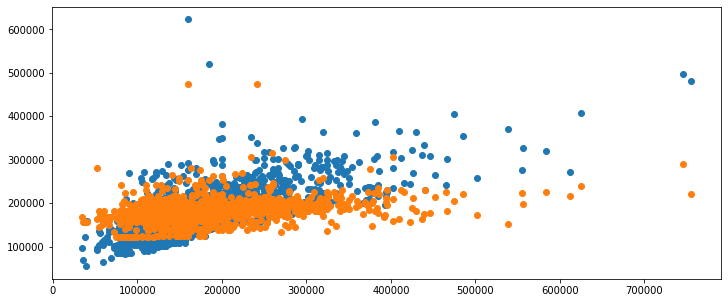

In [35]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred2); # blue obviously better
plt.scatter(y, y_pred); # orange

In [36]:

# We had 81 columns (80 features) in original dataset,
# coded as 221 features!
X.shape

(1460, 221)

In [37]:
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred3 = linear_model.predict(X)

In [39]:
linear_model.score(X, y)

0.9184728890914108

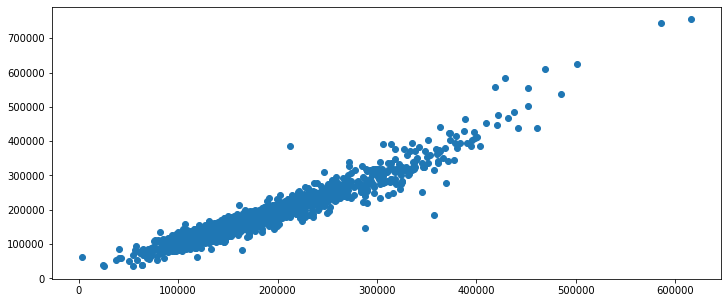

In [40]:

plt.figure(figsize=(12, 5))
plt.scatter(y_pred3, y);

#**Homework**
###Splitting the data for training and testing data to use 80% as training data.

In [41]:
#Initially just checking the shape of the actual dataset

housing.shape

(1460, 238)

In [42]:
X.shape

(1460, 221)

In [43]:
y.shape

(1460,)

In [44]:
from sklearn.model_selection import train_test_split        # importing the required library

# x = housing_ml.values
# y = sale_price.values

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 21)

In [45]:
x_train

array([[7.110e+02, 3.000e+01, 5.600e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.099e+03, 5.000e+01, 5.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.287e+03, 2.000e+01, 7.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [7.730e+02, 8.000e+01, 9.400e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.232e+03, 9.000e+01, 7.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [9.700e+02, 1.900e+02, 7.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [46]:
x_test

array([[8.810e+02, 2.000e+01, 6.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [6.060e+02, 6.000e+01, 8.500e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.167e+03, 2.000e+01, 6.400e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.008e+03, 1.600e+02, 2.100e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.760e+02, 5.000e+01, 8.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.000e+02, 1.600e+02, 2.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [47]:
y_train

array([ 52000, 128000, 143000, ..., 107000, 132500, 140000])

In [48]:
y_test

array([157000, 205000, 245350, 210000, 135000, 315500, 159895, 335000,
       386250, 137500, 170000, 289000, 180000, 129000, 161000, 153000,
       219210,  88000, 170000,  68500, 196000, 139000, 250580,  90350,
       215000, 755000, 165000, 174900, 105000, 146800, 200500, 148000,
       155000, 160000, 230000,  92900, 369900, 171500, 163990, 204750,
       208300, 164000, 126175, 275000,  96500, 158000, 110000, 377426,
       227875, 237000, 110000, 190000,  85000, 274000, 263435, 143000,
        94500, 188500, 256000, 230000, 239000, 105000, 153500, 138800,
       138500, 284000, 139000, 140000, 109008, 110000, 141000, 188000,
       173000, 154900, 137500, 200000, 128000, 239000, 205000, 213500,
       136900, 211000, 392000, 111250, 138000, 239686, 166000, 107500,
       167500, 213000,  93000,  67000, 130250, 197000, 124500, 423000,
       131000, 131000, 165500, 190000, 215000, 137900, 204000, 117500,
       202500,  80000, 144000, 297000, 129000, 258000,  93500, 244600,
      

### Analysis with Linear model

In [49]:
from sklearn.linear_model import LinearRegression     # importing

linear_model = LinearRegression()                     # initializing

In [50]:
# taking one feature i.e., one column from the data

X_ft1 = housing_ml[['LotArea']]

In [51]:
X_ft1.shape

(1460, 1)

In [52]:
y.shape

(1460,)

In [53]:

X_ft1.shape[0] == y.shape[0]

True

In [54]:
# X_ft1 = housing_ml[['LotArea']]
# y = sale_price.values

linear_model.fit(X_ft1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pd1 = linear_model.predict(X_ft1)
y_pd1

array([176580.91488881, 178995.88263327, 182460.83635359, ...,
       177824.09828422, 179241.57935162, 179703.573181  ])

In [56]:
linear_model.score(X_ft1, y)

0.0696133153821118

In [76]:
from sklearn.metrics import mean_squared_error
import numpy as np

X_ft1_array = X_ft1.to_numpy()

print(mean_squared_error(X_ft1_array, y_pd1))
print(np.sqrt(mean_squared_error(X_ft1_array, y_pd1)))

29158106894.49709
170757.45048019747


In [59]:
p_variables = list(housing_ml.columns)
p_variables

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'ExterQual_Coded',
 'ExterCond_Coded',
 'BsmtQual_Coded',
 'BsmtCond_Coded',
 'BsmtExposure_Coded',
 'BsmtFinType1_Coded',
 'BsmtFinType2_Coded',
 'HeatingQC_Coded',
 'KitchenQual_Coded',
 'Functional_Coded',
 'FireplaceQu_Coded',
 'GarageFinish_Coded',
 'GarageQual_Coded',
 'GarageCond_Coded',
 'PavedDrive_Coded',
 'CentralAir_Coded',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleC

In [60]:
len(p_variables)

221

In [84]:
list_score = []
for i in range(0, 10):
  linear_model.fit(housing_ml[[p_variables[i]]], sale_price)
  linear_model.score(housing_ml[[p_variables[i]]], sale_price)
  list_score.append(linear_model.score(housing_ml[[p_variables[i]]], sale_price))
print(list_score)

[0.0004803425911621418, 0.007103815434038263, 0.11215612336205594, 0.0696133153821118, 0.625651892462118, 0.00606154023811889, 0.27342162073249154, 0.25715139084530325, 0.22336446466934434, 0.14932026665622333]


In [89]:
list_rmse = []
for j in range(0, 10):
  linear_model.fit(housing_ml[[p_variables[i]]], sale_price)
  linear_model.score(housing_ml[[p_variables[i]]], sale_price)
  np.sqrt(mean_squared_error(housing_ml[[p_variables[i]]], sale_price))
  list_rmse.append(np.sqrt(mean_squared_error(housing_ml[[p_variables[i]]], sale_price)))
print(list_rmse)

[197106.97903969162, 197106.97903969162, 197106.97903969162, 197106.97903969162, 197106.97903969162, 197106.97903969162, 197106.97903969162, 197106.97903969162, 197106.97903969162, 197106.97903969162]


In [90]:
# 2 pairs of top 10

import itertools as it

combinations = it.combinations(list_score, 2)
combinations

In [92]:
for i in combinations:
    print(i, type(i))

(0.0004803425911621418, 0.007103815434038263) <class 'tuple'>
(0.0004803425911621418, 0.11215612336205594) <class 'tuple'>
(0.0004803425911621418, 0.0696133153821118) <class 'tuple'>
(0.0004803425911621418, 0.625651892462118) <class 'tuple'>
(0.0004803425911621418, 0.00606154023811889) <class 'tuple'>
(0.0004803425911621418, 0.27342162073249154) <class 'tuple'>
(0.0004803425911621418, 0.25715139084530325) <class 'tuple'>
(0.0004803425911621418, 0.22336446466934434) <class 'tuple'>
(0.0004803425911621418, 0.14932026665622333) <class 'tuple'>
(0.007103815434038263, 0.11215612336205594) <class 'tuple'>
(0.007103815434038263, 0.0696133153821118) <class 'tuple'>
(0.007103815434038263, 0.625651892462118) <class 'tuple'>
(0.007103815434038263, 0.00606154023811889) <class 'tuple'>
(0.007103815434038263, 0.27342162073249154) <class 'tuple'>
(0.007103815434038263, 0.25715139084530325) <class 'tuple'>
(0.007103815434038263, 0.22336446466934434) <class 'tuple'>
(0.007103815434038263, 0.14932026665